In [1]:
from IPython.display import Image

# Introduction 

## What are the Panama papers?

Panama papers are the leak of 11.5 millions documents. They describe details of evasion tax from the 1970s to 2015. For this project, we have access to the database of https://www.occrp.org/en/panamapapers/database. It contains four files describing different leaks of evasion tax: Panama papers, Bahamas leaks, Offshore leaks and Paradise papers. The goal of this project is to compile these four files to create an homogeneous database and extract relevant information. We focus on five research questions to show how evasion tax evolves over time and how significant this problem is.

## Definition of important terms

Before going into the details, we start by defining important terms which will be used in this project.

### Nodes and edges

This database can be represented as a graph. It contains nodes which are connected using edges. In this project, a node can be an officer, an intermediary or entity. It contains a country, a juridsiction and a creation date. An edge is a relation between two nodes, it contains a creation date, a deletion date, and the nature of the relation between the nodes.

### Entity

An entity is an offshore company located in a country with low-tax. The goal of this company is to attract non-resident clients which send them their money. The idea is to reduce significantly the amount of tax paid by the clients.

### Officer

An officer is the client of an entity, it can be a person or a company.

### Intermediary

An intemediary is a middle person or company between an officer and an entity. It gets the money from the officer and signs the contract with the entity. The goal is the hide the officer from the contract.

### Address

For intermediary, officer, and entity, the address is contained in another node called address. To retrive the address of those first nodes, you therefore need to follow the edges of type 'address_of'.

### Country vs Jurisdiction

Nodes can be defined by jurisdictions and origin countries. It is imporant to define the difference between those two terms. An origin country is the physical location an entity, while a jurisdiction is the country whose law the entity obeys to.

# Relevant statistics about Panama papers

The database contains **1'906'686 nodes** and **3'142'523 edges**.

The node that has the most **outgoing edges** has **36373** outgoing edges and the node that has the most **incoming edges** has **37338** outgoing edges.

**29.55%** of edges have a **start date** and among those, **22.32%** have an **end date**. They range from **1960-03-10** to **2015-12-31**. Whereas the entities creation dates range from **1960-01-01** to **2015-12-31**.

Some edges have the same start and end country. The top 3 countries with the most outgoing edges not pointing towards themselves are :
1. **Hong Kong** with **169'161** outgoing edges
2. **USA** with **105'267** outgoing edges. 
3. **China** with **94'434** outgoing edges.

Likewise, some edges have the same start and end jursidiction. The top 3 jurisdictions with the most incoming edges are :
1. **British Virgin Islands** with **523'869** outgoing edges
2. **Malta** with **214'848** outgoing edges. 
3. **Bermuda** with **154'931** outgoing edges.

We are considering start countries and end jurisdictions because relationships always go from people towards the entity. And the people have a country code and entities have a jurisdiction.

In the chart below we can see the nodes' types distribution. What stands out is that there is a very small number of intermediaries compared to the number of entitites and officier.

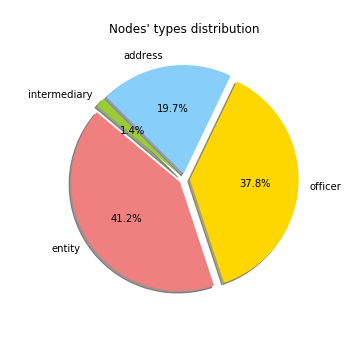

In [22]:
Image(filename='Plots/0.png')

## Which countries contribute the most to tax evasion?

A first great way to get insight into the data is to plot on a map the countries with the most outgoing connections.

This is done on the following map : <div> <a href="biggest.html">Top 10 countries</a> </div>

It is interactive : to see a specific country, click the button on the top right corner.

As we can see from the map above, some of these countries have already jurisdictions with a low tax rate. This can be explained by the fact that many multinationals have their headquarters in tax havens.

# What is our Goal in this Project? (Research Questions)

We chose this project because tax evaders, and inequalities of wealth is a very hot topic right now. We wanted to see how important the problem was, and if we could find some explanations/causes for tax evasion. Indeed a good understanding of that matter could help finding compromises between tax evaders and governments. One regret we have, was we couldn't find (and didn't have time to scrap one) a satisfying database for changes in fiscal policies of countries in order to correlate them with offshore account's creation. Nevertheless we did find some obvious events that we will detail in question I.

Here is the path we followed to answer all the research questions we imagined at the beginning of this project.

I. We start by analyzing the evolution of the number of offshore societies over time.

II. We then try to see if people are the sole owners of their offshore societies or if they share this ownership with others.

III. Next we investigate to how many offshore societies people are connected to.

IV. Afterwards we try to give some meaning to the very odd distribution of the number of intemediaries.

V. Finally we at the correlation between the location of the offshore societies and location of their owners.

## I) How does the number of offshore societies evolve over time?

One of the most interesting insights we can get from the Panama Papers data is how the offshore societies evolve over time. In other words, when were most these offshore societies created or deleted?

We start by plotting the number of offshore societies creations per month (left plot) and per year (right plot).

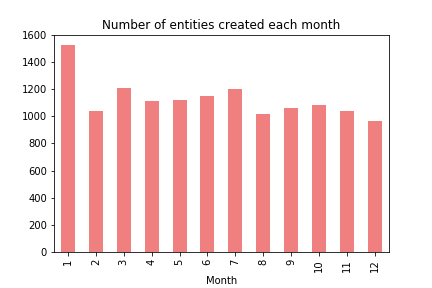

In [29]:
Image(filename='Plots/1.Months.png')

On the left plot we can see that the seasonality of the creation of offshore societies. Of course February is smaller, because it has less days. We can also see that there are less creations in August just as there are fewer business activities during the summer. However it is not as strong as companies' usual decrease in revenues around this period.

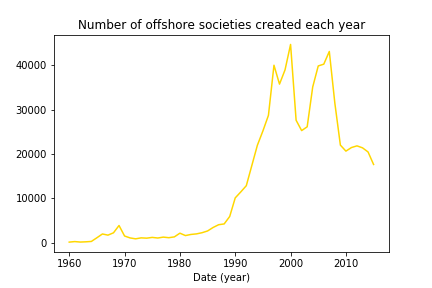

In [31]:
Image(filename='Plots/1-1.png')

On this plot: 

- We can see a peak in the number of creations of offshore societies between year 1995 and 2000.
Our best explanation for this peak is the **Dot-com bubble**.
The Dot-com bubble was a period of extreme economic speculation in the end of the 90s, which generated lots of profits for some trader's making them eager to transfer those profits through offshore accounts and avoid taxes. 

- We can see another peak between the years 2004 and 2008.
Our hypothesis is it was cause by the speculation regarding the real estate market, which caused the 2008 financial crisis. This peak is followed by a sudden decrease, in further graphs we will nevetheless see that it doesn't imply a decrease in the actual number of accounts.

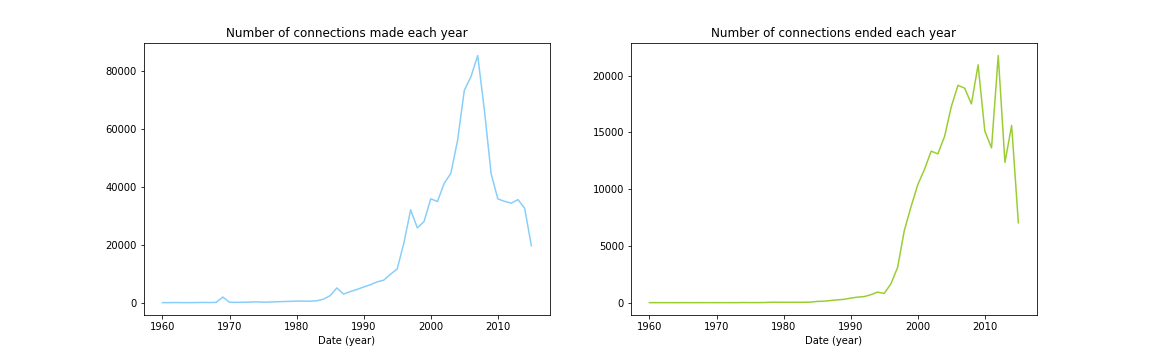

In [4]:
Image(filename='Plots/1-2.png')

The left plot shows a peak in the creation of edges around 2008-2009. Our two hypothesis for this difference in the date of offshore company creation and edge creation, are both of them are related to inertia :
- *Administrative/human inertia* : once an offshore company is created it takes time to connect everyone to it, and/or convince everyone to join the movement
- *Economic inertia* : once an offshore company is created, it generates more money, and, after some time, makes it possible for it to expand and have more employees/shareholders

The right plot (deletion of connections over the years) is more or less similar to the creation of companies. It can explain that some people quit their original company and joined another, or that the government started paying more attention/track down people having links to offshore societies

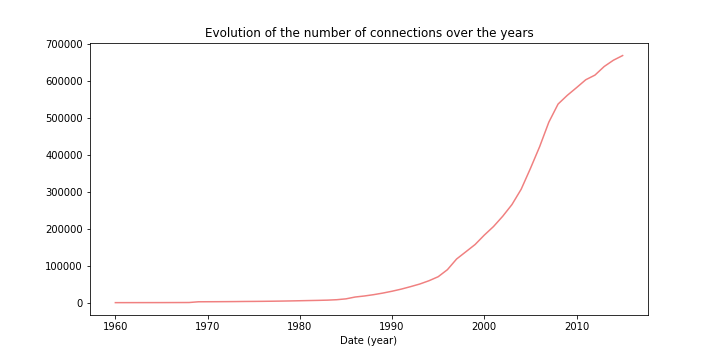

In [5]:
Image(filename='Plots/1-3.png')

We observe a an exponential increase in the number of offshore societies in 2000.

## II) Do people share ownership of their offshore society?

It is interesting to investigate whether people are the sole owners of their offshore society or if they share the ownership with others.

Let's first plot the distribution of offshore societies ownership :

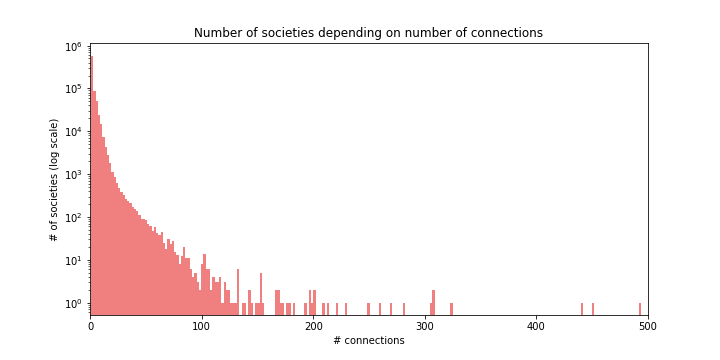

In [25]:
Image(filename='Plots/3-1.png')

We can see that most of the offshore societies have only one owner. And the number of connections per offshore society decreases exponentially.

Let's look at this from an other angle. We can divide these values in four categories depending on the number of connections per offshore society.
1. Societies that have 1 connection
2. Societies that have 2 to 4 connections
3. Societies that have 5 to 9 connections
4. Societies that have 10 or more connections

These same 4 categories will be used throughout this data story.

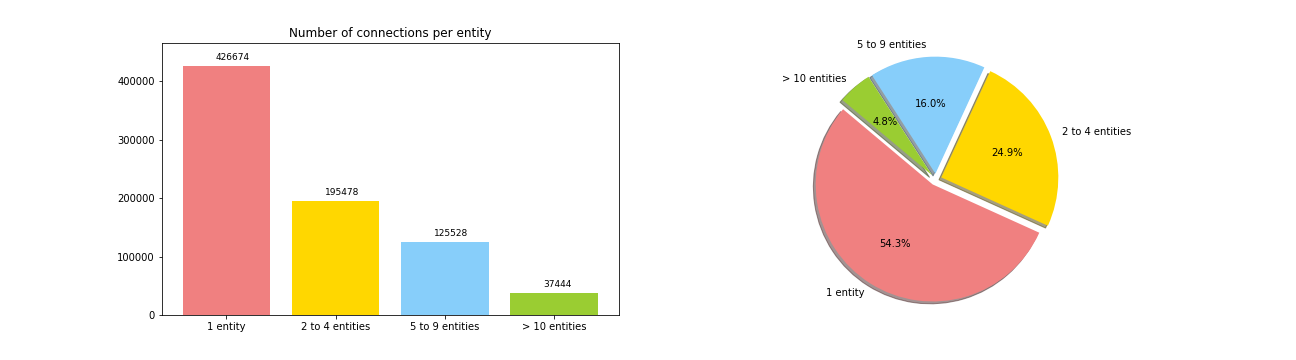

In [7]:
Image(filename='Plots/3-2.png')

Half of the people are only related to one company. Those people are most exclusively officers.

## III) To how many offshore societies are people connected to?

Now we are interested in knowing how likely it is for someone that is already connected to an offshore society to be connected to more than one of these offshore societies.

The number of offshore societies per owner can be simply plotted as follows :

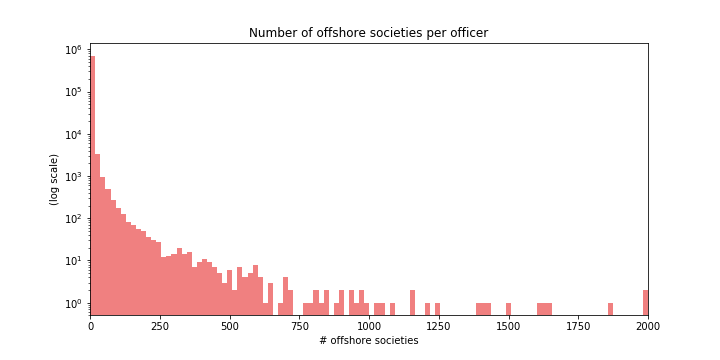

In [8]:
Image(filename='Plots/2-1.png')

We can again divide into the same categories as above to view the data from an other angle. As the great majority of people are connected to only one entity, we add a third plot to focus on people connected to more than one entity.

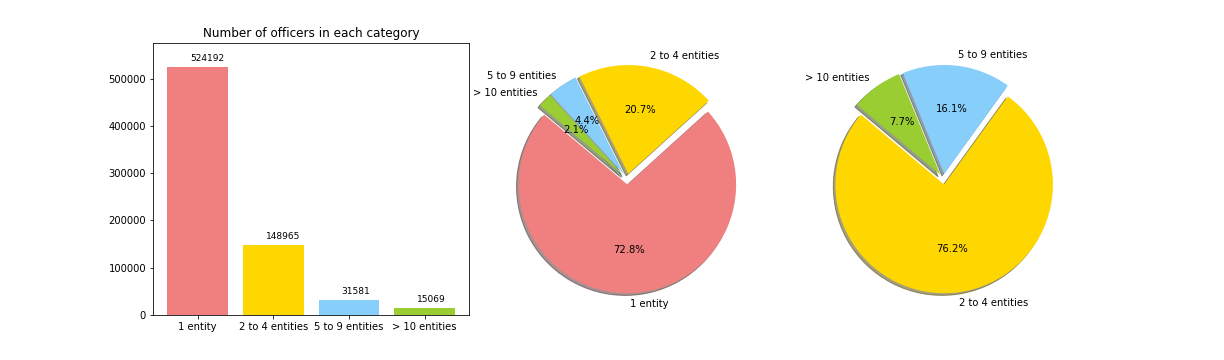

In [26]:
Image(filename='Plots/2-2.png')

These distributions show that ownership of a company is a much more privileged relationship. **72.8%** of societies are handled by only one person. We will see below that in **91%** of the cases this person is an intermediary, meaning everything goes through one person, but there might be many people behind, which we can't tell.

## IV) How does the proportion of intermediaries depend on the category of company (number of connections) ?

Only **1.35%** of nodes are intermediaries, yet **21.18%** of edges have an intermediary in them. Very few intermediaries play a central role in offshore companies. In the following pie chart we can see the proportion of officers/intermediaries depending on the type of the entity. We kept the same types of entity as in previous analysis : entites with [1] connection, [2-4] connections, [6-9] connections, [10+] connections.

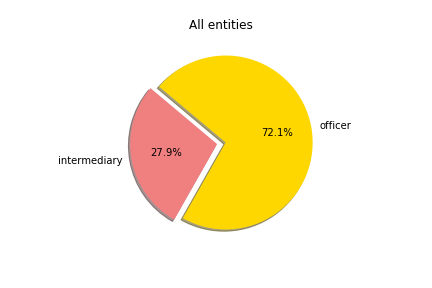

In [19]:
Image(filename='Q4_all_distrib.png')

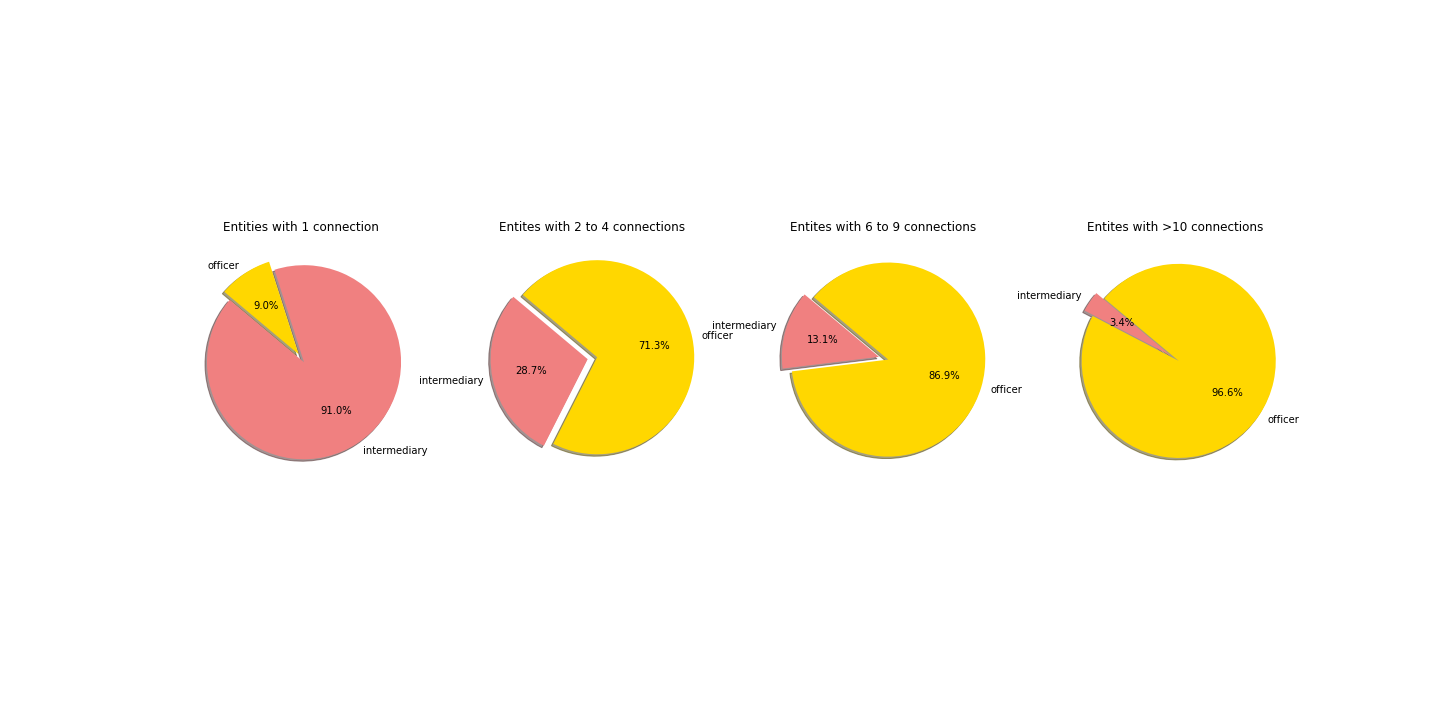

In [20]:
Image(filename='Q4_distribs.png')

As we can see, even if the company has many connections, they don't need more intermediaries, and therefore the proportion of intermediary becomes very small for companies with a lot of connections.

Intermediary are essential for an offshore company, it at least need one to communicate with. But having more people in the company doesn't mean you need more intermediaries to do the work. Intermediaries must therefore have a lot of work when connected to a big company.

This raises one question : if intermediaries are connected to big companies, are they connected to fewer companies in number ? In other words : if you're an intermediary of a big company do you only take care of this one ?

On average an intermediary is connected to **25.1** entities
On average an intermediary that is at least connected to an entity of category :
- **[1]** is connected tois connected to **31.3** entities
- **[2-4]** is connected to **49.2** entities
- **[5-9]** is connected to **42.4** entities
- **[10+]** is connected to **82.0** entities

**Note :** It might sound weird that each one of these averages are all higher individually than the global average.

But it actually tells us that intermediaries with many connections have clients (entities) in all of the categories ! Indeed those *big* intermediaries are therefore overrepresented in those means. This also means that the more connections you have as an intermediary, the more diverse they will be.

This is the opposite of what we predicted, the bigger entities you're an intermediate of, the more entities you are connected to. This probably means that some people or groups of people are notorious intermediaries and are therefore working for many entities, and their experience makes them attractive for bigger companies.

The domination of some huge intermediaries over the other ones can be clearly seen with the following boxplot, where the mean crushes the median.

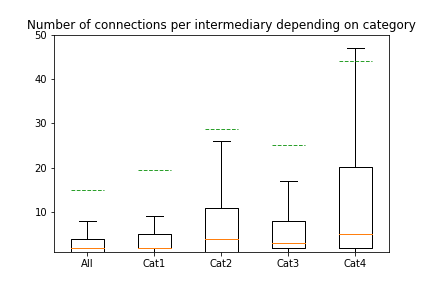

In [12]:
Image(filename='Q4_boxplot.png')

**Note: 26 intermediaries with more than 2000 connections were removed because otherwise the boxplot becamse even less readable.*

## V) Correlation between the location of the people and the location of their offshore society?

We are now interested in knowing if there exists a correlation between the location of the people and the location of their offshore society.

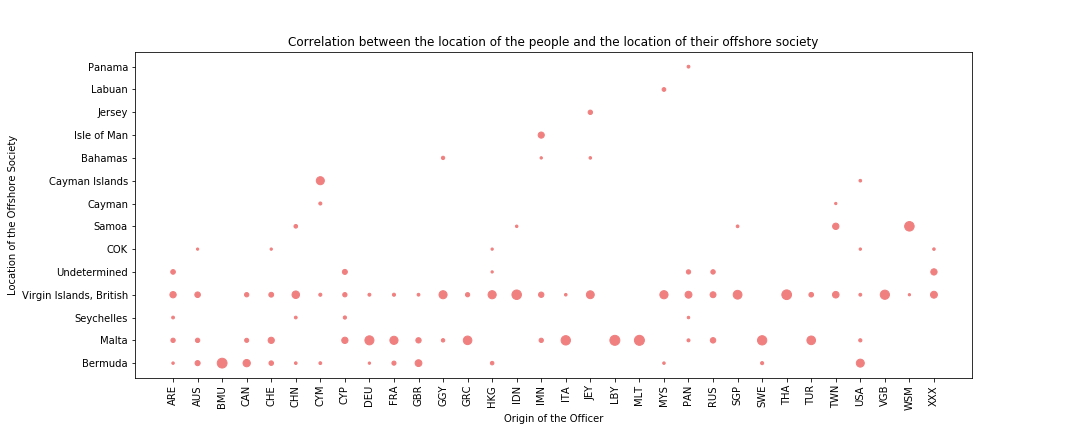

In [13]:
Image(filename='Plots/5-1.png')

Another way to see if there is a correlation between these locations is to directly look at a map. The following link is a map to visualize the distribution of the jurisdictions in which each country detains its account :
<div>
    <a href='markers.html'>Markers map</a>
</div>

There is a pin for each of the 100 biggest countries. It is interactive : to see the distribution of a country, click on it.

# Conclusion

We have been able to correlate the evolution in creation and deletion of nodes/edges with some major economic events. Our data exploration showed that offshore accounts are rarely shared between officers, and generally managed by a few people. We understood that intermediaries are very active people, they handle a lot of different entities. Almost all the entities handled by one person are handled by an intermediary that could possibly hide a massive structure. We were not able to find this information, but we have found some of the main actors of the offshore world, and their localisation. There are some obvious hubs for offshore accounts (Virgin Islands, Malta, Bermuda...).
Our work will hopefully make you able to explore easily preprocessed useful data yourself in an interactive fashion.